In [1]:
import random
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


Using TensorFlow backend.
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
# zeroIndex = pd.read_csv('zero indexes_without softmax.csv')

# zeroIndex = list(zeroIndex['0'])

In [3]:
# probableZero = pd.read_csv('../../triple_cosineSNF(zeros).csv').iloc[zeroIndex,:]

In [4]:
# # probableZero.to_csv('../../probableZeroes.csv',index=False)
# probableZero = pd.read_csv('../../probableZeroes.csv')

In [5]:
# r, c = probableZero.shape
# probableZero.head()

In [6]:
# probableZero.head()

In [7]:
# indexes = []
# bufpairs = []
# for i in range(15000):
#     candInd = np.random.randint(r)
# #     if (len(indexes)< r-1):
#     if (candInd not in indexes):
#         indexes.append(candInd)
# #         print(candInd)
#     else:
#         while(True):
#             candInd = np.random.randint(r)
#             if candInd not in indexes:
#                 break
#         indexes.append(candInd)
# #         print(candInd)
#     di, dj = str(probableZero.iloc[candInd,0]), str(probableZero.iloc[candInd,1])
# #     print(di,dj)
#     try:
#         bufpairs = probableZero[probableZero.iloc[:,0]==dj]
#         indexes.append(int(bufpairs[bufpairs.iloc[:,1]==di].index[0]))
#     except:
#         1+1

# print(len(indexes))

In [8]:
# probableZero.iloc[177796,:]

In [9]:
# # checked = False
# problems = []
# i = 0
# while(i + 1 < len(indexes)):
# #     if i + 1 == len(indexes):
#     if (probableZero.iloc[indexes[i],0]==probableZero.iloc[indexes[i+1],1])and(probableZero.iloc[indexes[i],1]==probableZero.iloc[indexes[i+1],0]):
#         i += 2
# #         print(i)

#     else:        
#         problems.append([i,probableZero.iloc[i,:]])
# #         print([i,drugsPairs.iloc[i,:]])
#         del indexes[i]
# #         i += 1
# #         if i + 1 == len(indexes):
# #             problems.append(list(i,drugsPairs.iloc[i,:]))
# #             indexes.remove(i)

# print(len(problems))

In [10]:
# print(len(indexes))


In [11]:
# probableZero.iloc[indexes,:].to_csv('../../probableZeroes25000.csv',index=False)
# probableZero.head()

In [69]:
zeros = pd.read_csv('../../probableZeroes25000.csv')

In [70]:
dataTrain = pd.read_csv('../../tripleTrain.csv')
dataTest = pd.read_csv('../../tripleTest.csv')


In [37]:
r,c = zeros.shape

In [38]:
dataTrain = dataTrain.append(zeros.iloc[:int(0.9*r),:], ignore_index = True) 

In [71]:
dataTest = dataTest.append(zeros.iloc[int(0.9*r):,:], ignore_index = True) 

In [72]:
del zeros
# del probableZero

In [ ]:
# Shuffle datasets
dataTrain = dataTrain.sample(frac=1).reset_index(drop=True)
dataTest = dataTest.sample(frac=1).reset_index(drop=True)

In [41]:
# X_train = dataTrain.values[:,3:]
# y_train = dataTrain.values[:,2].astype(int)
# del dataTrain
# # X_test = dataTest.values[:,3:]
# # y_test = dataTest.values[:,2].astype(int)


In [42]:
# trainNum = len(X_train)

In [43]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

In [44]:
16*71

1136

In [45]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

In [46]:
# X_train.shape

In [47]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

In [48]:
# y_train

In [49]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

# #one-hot encode target column
# # y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # y_test[0]

In [50]:
# y_train

In [51]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)
del dataTest
testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
# y_train = y_train / 2
# y_test  = y_test / 2
print(y_train[0], y_test[0])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


0 2


In [52]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [53]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 3, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('cnn42702(1and-1)dense1024to64.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
__________

In [54]:
# #### plotting model
# plot_model(model,show_shapes = True, to_file='modelLastDense_3.png')

In [83]:
# #### train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)
# model.fit(X_train, y_train, epochs=10)


Train on 62230 samples, validate on 6950 samples
Epoch 1/2
62230/62230 [==============================] - 631s 10ms/step - loss: 0.1202 - acc: 0.9534 - val_loss: 0.2390 - val_acc: 0.9281
Epoch 2/2
62230/62230 [==============================] - 632s 10ms/step - loss: 0.1084 - acc: 0.9583 - val_loss: 0.2421 - val_acc: 0.9263


In [84]:
### Saveing the Model
model.save_weights('Weight\model with zeros_10epoch.h5')


In [101]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
print(predit[:4],X_test[:4,2])



AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [86]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " -1s AUPR and AUC")

0.7545942874107456 0.9567180385716729  -1s AUPR and AUC


In [87]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,2], predit[:,2])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,2], predit[:,2])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " +1s AUPR and AUC")

0.9759146064656097 0.9786577250067463  +1s AUPR and AUC


In [88]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,1], predit[:,1])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,1], predit[:,1])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val, " 0s AUPR and AUC")

0.9184720351842297 0.9512029639835894  0s AUPR and AUC


In [89]:
print(model.history.history['val_acc'])

[0.9280575539739869, 0.9263309352689509]


In [90]:

# # Plot training & validation accuracy values
# plt.plot(list(range(1,9)),model.history.history['acc'])
# plt.plot(list(range(1,9)),model.history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(list(range(1,9)),model.history.history['loss'])
# plt.plot(list(range(1,9)),model.history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [91]:
# # predit
# predit[:,0].shape 

In [92]:
predicts = []
for a,b,c in predit:
    if a >b and a>c:
        predicts.append(0)
    elif c>a and c>b:
        predicts.append(2)
    else:
        predicts.append(1)

In [93]:
# predicts = []
# e = d = z = 0

# for a,b in predit:
#     if a >=0.9:
#         predicts.append(0)
#         d += 1
#     elif b>=0.9:
#         predicts.append(2)
#         e += 1
#     else:
#         predicts.append(1)
#         z += 1
# print('degrassive', d, 'enhancive', e, 'zeros', z)

In [94]:
# max(list((dataTest.values[:,2]+1)/2))

[[ 742   81   42]
 [  92 2427   67]
 [  90  140 3269]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       924
           1       0.94      0.92      0.93      2648
           2       0.93      0.97      0.95      3378

    accuracy                           0.93      6950
   macro avg       0.91      0.90      0.90      6950
weighted avg       0.93      0.93      0.93      6950

0.07366906474820144


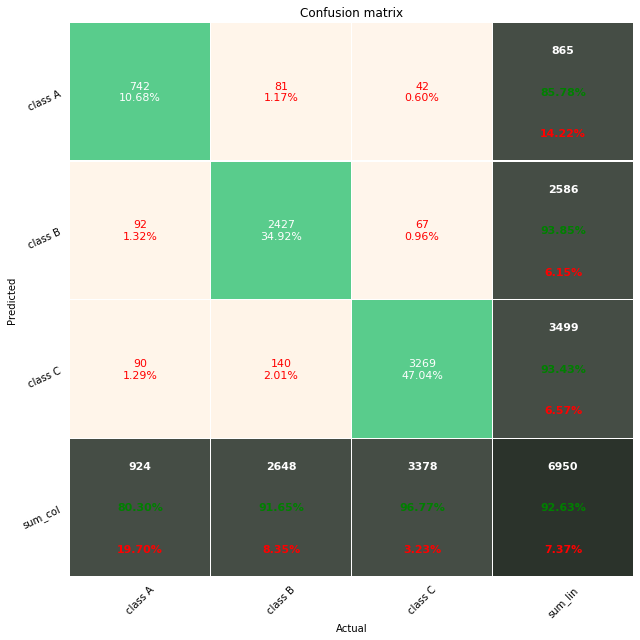

In [100]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
print(CR)
print((92+90+140+67+42+81)/(6950))
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)), list(predicts))
plt.show()

In [75]:
print(pd.DataFrame(predit))


                 0             1             2
0     1.265871e-02  1.909845e-02  8.484587e-01
1     2.580374e-01  7.796742e-02  5.531256e-01
2     2.321702e-07  6.286601e-07  9.999963e-01
3     1.721992e-06  6.226496e-06  9.999862e-01
4     2.279629e-01  1.044303e-01  2.818213e-01
...            ...           ...           ...
6945  4.544010e-07  2.073588e-01  5.929003e-01
6946  1.755585e-10  2.160944e-01  8.828766e-06
6947  8.518394e-10  2.559699e-01  7.376468e-06
6948  1.094196e-10  8.207543e-01  3.439660e-06
6949  2.337624e-10  6.512259e-01  5.034896e-07

[6950 rows x 3 columns]


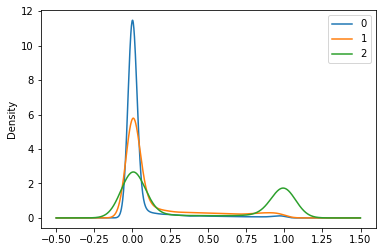

In [76]:
pd.DataFrame(predit).plot.density()
plt.show()

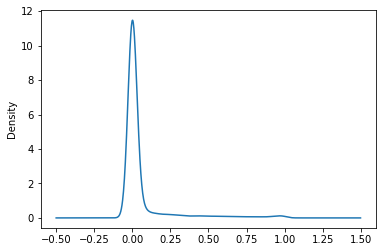

In [77]:
pd.DataFrame(predit).iloc[:,0].plot.density()
plt.show()

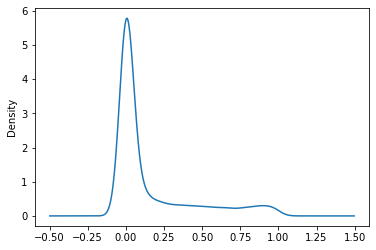

In [78]:
pd.DataFrame(predit).iloc[:,1].plot.density()
plt.show()

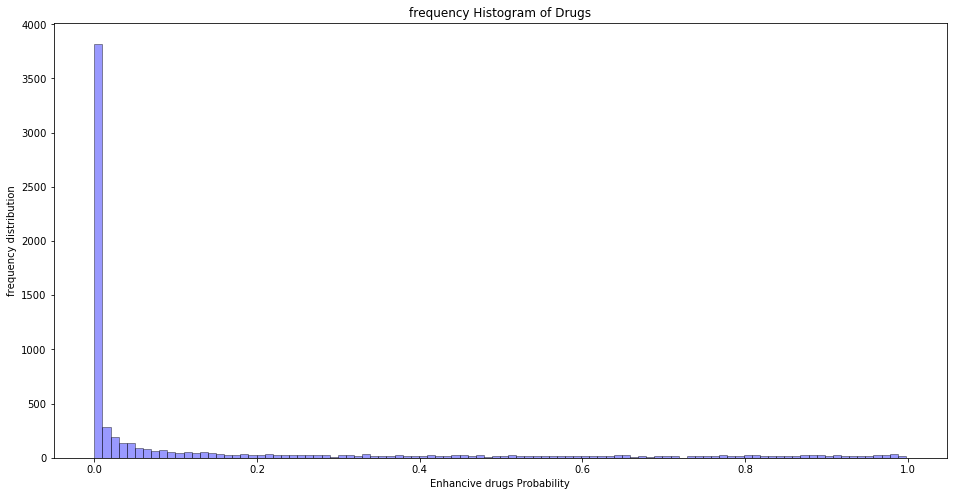

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

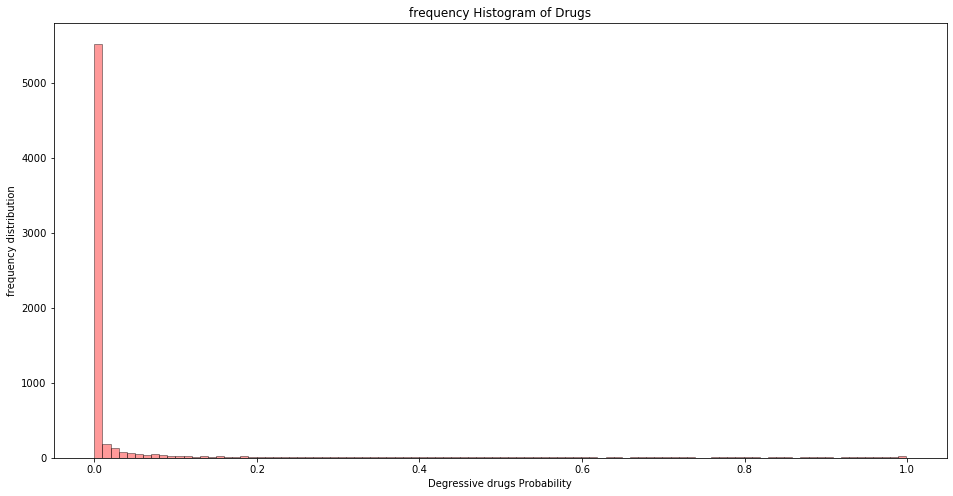

In [80]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

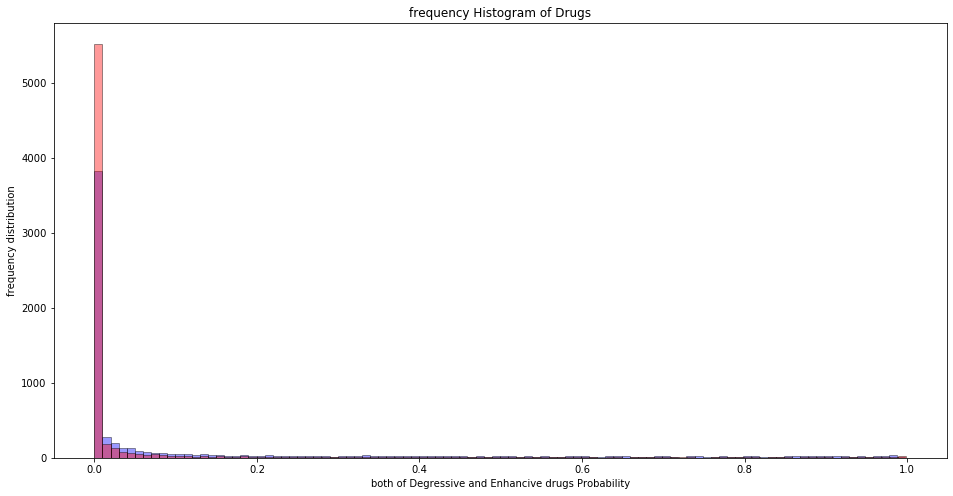

In [81]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()